# AST4930 Homework Assignment #7 (20 pts + 2 pts)

### Instruction:

In this homework, we will use the SDSS DR16 data (https://www.sdss.org/dr16/) and build deep neural networks which will be used to classify objects into galaxies, quasars, and stars. This is the same dataset we used for Homework Assignment #2 and #3. 

Below you will find instruction to this homework assignment.

1. I learned that when I download your .ipynb file from Canvas, it automatically adds your name to the file name. So you don't have to put your last name manually as you did last time.

2. As you will see, the Notebook is partially filled. Fill in the empty cells. 

3. Note that there are questions you will have to answer. They will start with "Q: ..." The answers will be graded so make sure you answer all the questions.

4. It's fine you work on somewhere else than HiPerGator. But when I grade your homework, I will run your Jupyter Notebook on HiPerGator. So before you submit your homework, make sure you test it on HiPerGator and see if you get any error messages. For this particular homework assignment, we are concerned about the computing time so I'd like you all to use the HiPerGator resources for a fair comparison. 

5. It's fine if you use someone else's code you found on Internet, but make sure you write down the source. You don't have to cite me when you use anything from AST4930 Notebook. But as we learned from Homework Assignment #2, I do make mistakes. So please double-check before you copy and paste my script!

6. It's a common sense but just to make sure... when you make a figure, make sure they are readable/understandable. If you cannot see the title, labels, data points, or if you don't understand the point of the figure, I won't probably be able to see/understand them either!

6. Submit your final .ipynb file via Canvas before the due date.

### Let's load the data. This is the same dataset we used for Homework Assignment #2 and #3.

In [1]:
import pandas as pd 

data = pd.read_csv('/blue/ast4930/share/SDSS.csv')

### Let's have a look at the data to gain insights.

In [2]:
data

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237655107828973746,138.937318,49.779249,17.32152,16.28594,15.88471,15.66384,15.46604,2243,301,3,152,862475375345690624,GALAXY,0.028514,766,52247,131
1,1237678584114511952,31.594644,22.451246,18.13019,17.47997,16.97868,16.75768,16.83714,7709,301,3,65,2303710287351539712,QSO,1.694959,2046,53327,433
2,1237680298881122360,333.991221,19.977552,18.94798,18.80473,18.75522,18.72968,18.66552,8108,301,5,79,8532228490187264000,QSO,2.046520,7578,56956,578
3,1237650761319514319,186.201096,-2.808180,19.22969,18.04638,17.37830,16.99285,16.76479,1231,301,3,113,376103378880587776,GALAXY,0.000000,334,51993,192
4,1237648722280317126,124.814240,0.651496,18.76061,17.28682,16.74055,16.55152,16.45902,756,301,5,60,2316149895234349056,STAR,0.000196,2057,53816,632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1237673758185554973,100.889697,29.106283,19.17071,18.21106,17.80099,17.63203,17.53079,6585,301,6,121,3013004977846118400,STAR,0.000160,2676,54179,352
149996,1237671262268752282,124.964450,9.635759,19.38253,17.49415,16.55436,16.13420,15.80408,6004,301,5,61,2728125362876737536,GALAXY,0.110984,2423,54149,254
149997,1237673756573762584,98.821075,26.946457,18.90948,17.73591,17.31252,17.16612,17.07103,6585,301,3,103,3035579600630474752,STAR,0.000097,2696,54167,558
149998,1237678877782966354,320.766012,9.993010,17.63177,16.10855,15.35884,15.21912,15.11279,7777,301,6,66,821986413082863616,STAR,-0.000218,730,52466,289


### In addition to ugriz magnitudes, we will use colors (u-g, g-r, r-i, i-z) so let's make those arrays.

In [3]:
data['u-g'] = data.u-data.g
data['g-r'] = data.g-data.r
data['r-i'] = data.r-data.i
data['i-z'] = data.i-data.z

### Features and target

In [4]:
X = data[['u','g','r','i','z','u-g','g-r','r-i','i-z','redshift']]
y = data['class']

In [5]:
X

,u,g,r,i,z,u-g,g-r,r-i,i-z,redshift
0,17.32152,16.28594,15.88471,15.66384,15.46604,1.03558,0.40123,0.22087,0.19780,0.028514
1,18.13019,17.47997,16.97868,16.75768,16.83714,0.65022,0.50129,0.22100,-0.07946,1.694959
2,18.94798,18.80473,18.75522,18.72968,18.66552,0.14325,0.04951,0.02554,0.06416,2.046520
3,19.22969,18.04638,17.37830,16.99285,16.76479,1.18331,0.66808,0.38545,0.22806,0.000000
4,18.76061,17.28682,16.74055,16.55152,16.45902,1.47379,0.54627,0.18903,0.09250,0.000196
...,...,...,...,...,...,...,...,...,...,...
149995,19.17071,18.21106,17.80099,17.63203,17.53079,0.95965,0.41007,0.16896,0.10124,0.000160
149996,19.38253,17.49415,16.55436,16.13420,15.80408,1.88838,0.93979,0.42016,0.33012,0.110984
149997,18.90948,17.73591,17.31252,17.16612,17.07103,1.17357,0.42339,0.14640,0.09509,0.000097
149998,17.63177,16.10855,15.35884,15.21912,15.11279,1.52322,0.74971,0.13972,0.10633,-0.000218


### Below is to convert the labels to "one-hot encoded" integers (see e.g., https://en.wikipedia.org/wiki/One-hot)

In [6]:
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras as keras

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

# convert integers to dummy variables (i.e. one-hot encoded)
dummy_y = keras.utils.to_categorical(encoded_y)

In [7]:
y

0         GALAXY
1            QSO
2            QSO
3         GALAXY
4           STAR
           ...  
149995      STAR
149996    GALAXY
149997      STAR
149998      STAR
149999    GALAXY
Name: class, Length: 150000, dtype: object

In [8]:
dummy_y

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

### Now, build DNNs, optimize hyperparameters, train and evaluate DNNs.

This is the last homework of the course, so I am not going to guide you step by step like I did before. You should be able to do this by now :) Things you should include at the very least are: hyperparameter optimization, loss/accuracy vs. epoch plots, confusion matrix.


### Q: Before you get started, do we need feature scaling for DNNs or not? Why?

In [9]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.2, random_state=0)

In [10]:
X_test

,u,g,r,i,z,u-g,g-r,r-i,i-z,redshift
16269,19.00265,18.87546,18.73973,18.86241,18.88695,0.12719,0.13573,-0.12268,-0.02454,0.931587
140471,19.42607,19.13287,19.09982,19.18166,19.34250,0.29320,0.03305,-0.08184,-0.16084,1.745666
78683,18.44878,18.34013,18.17333,18.12089,18.21554,0.10865,0.16680,0.05244,-0.09465,1.389928
2605,17.86208,16.86414,16.46683,16.14366,16.03217,0.99794,0.39731,0.32317,0.11149,0.100090
81156,17.58162,16.65378,16.35419,16.23794,16.21991,0.92784,0.29959,0.11625,0.01803,-0.000061
...,...,...,...,...,...,...,...,...,...,...
8727,17.47287,15.53508,14.64960,14.22503,13.92174,1.93779,0.88548,0.42457,0.30329,0.050413
138804,19.20969,18.88628,18.81536,18.81973,18.76862,0.32341,0.07092,-0.00437,0.05111,0.699720
135967,19.25007,17.16082,16.14614,15.71808,15.37367,2.08925,1.01468,0.42806,0.34441,0.116147
105000,16.69742,15.04722,14.46561,14.27657,14.21023,1.65020,0.58161,0.18904,0.06634,-0.000105


In [11]:
y_test


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [12]:
model = keras.models.Sequential([
    keras.layers.Input(shape=X_train.shape[1]),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1000, activation='relu',),
    keras.layers.Dense(np.unique(y).shape[0], activation='softmax')
])

2021-12-15 21:39:35.132228: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/slurm/lib64:/opt/slurm/lib64:
2021-12-15 21:39:35.132284: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-15 21:39:35.132331: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c0700a-s1.ufhpc): /proc/driver/nvidia/version does not exist
2021-12-15 21:39:35.132685: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              11000     
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3003      
Total params: 1,015,003
Trainable params: 1,015,003
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [15]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

2021-12-15 21:39:35.243465: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
3000/3000 [==============================] - 21s 7ms/step - loss: 0.2367 - accuracy: 0.9265 - val_loss: 0.1331 - val_accuracy: 0.9642
Epoch 2/100
3000/3000 [==============================] - 20s 7ms/step - loss: 0.1254 - accuracy: 0.9649 - val_loss: 0.1072 - val_accuracy: 0.9745
Epoch 3/100
3000/3000 [==============================] - 20s 7ms/step - loss: 0.1045 - accuracy: 0.9714 - val_loss: 0.0977 - val_accuracy: 0.9723
Epoch 4/100
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0969 - accuracy: 0.9740 - val_loss: 0.0829 - val_accuracy: 0.9785
Epoch 5/100
3000/3000 [==============================] - 20s 7ms/step - loss: 0.0910 - accuracy: 0.9756 - val_loss: 0.0949 - val_accuracy: 0.9733
Epoch 6/100
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0840 - accuracy: 0.9775 - val_loss: 0.0742 - val_accuracy: 0.9810
Epoch 7/100
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0836 - accuracy: 0.9774 - val_loss: 0.0931 -

In [16]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.053935714066028595
Test accuracy: 0.9855666756629944


Text(0, 0.5, 'loss, validation loss')

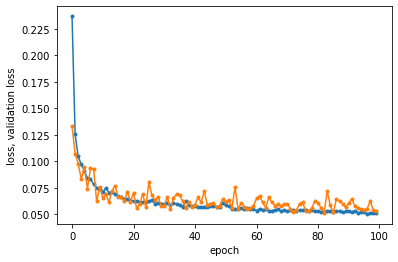

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.epoch, history.history['loss'],'.-')
plt.plot(history.epoch, history.history['val_loss'],'.-')
plt.xlabel('epoch')
plt.ylabel('loss, validation loss')

Text(0, 0.5, 'accuracy, validation accuracy')

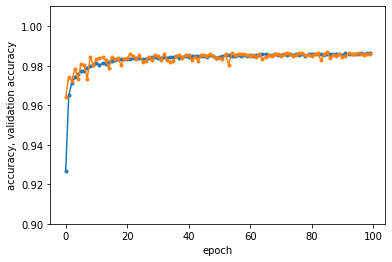

In [18]:
plt.plot(history.epoch, history.history['accuracy'],'.-')
plt.plot(history.epoch, history.history['val_accuracy'],'.-')
plt.ylim(0.9,1.01)
plt.xlabel('epoch')
plt.ylabel('accuracy, validation accuracy')

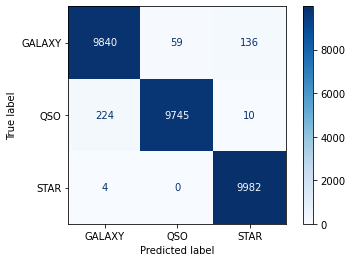

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

cf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=np.unique(y))
disp.plot(cmap='Blues')

### Evaluate your final model. If you get >= 99% accuracy on your test dataset, you get 2 extra points.

In [20]:
#model1 = keras.models.Sequential([
#    keras.layers.Input(shape=X_train.shape[1]),
#    keras.layers.Dense(1000, activation='relu'),
#    keras.layers.Dense(np.unique(y).shape[0], activation='softmax')
#])
#

model1 = keras.models.Sequential([
    keras.layers.Input(shape=X_train.shape[1]),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1000, activation='relu',),
    keras.layers.Dense(np.unique(y).shape[0], activation='softmax')
])

In [21]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              11000     
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 3003      
Total params: 1,015,003
Trainable params: 1,015,003
Non-trainable params: 0
_________________________________________________________________


In [22]:
#model1.compile(loss='categorical_crossentropy',
#              optimizer=keras.optimizers.Adam(learning_rate=1e-5),
#              metrics='accuracy')
#
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [23]:
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)

history1 = model1.fit(X_train, y_train, epochs=1,
                    validation_split=0.2,
                    callbacks=[checkpoint_cb, early_stopping_cb])

3000/3000 [==============================] - 14s 5ms/step - loss: 0.2385 - accuracy: 0.9236 - val_loss: 0.1379 - val_accuracy: 0.9604


In [25]:
#loss, accuracy = model1.evaluate(X_test, y_test, verbose=0)
#print('Test loss:', loss)
#print('Test accuracy:', accuracy)

### Q: How does the model performance compare with what you got in homework #2 and #3? What pros and cons of DNNs did you find? 